In [ ]:
import re
import os
import math
import imghdr
from PIL import Image
from textwrap import wrap
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
def get_label(filename, pattern):
    matches = re.findall(pattern, os.path.basename(filename))
    if matches:
        return matches[0]
    else:
        return None

In [ ]:
def is_image(filename):
    return imghdr.what(filename) is not None

In [ ]:
def get_labeled_images(path, pattern):
    full_file_paths = [os.path.join(path, file) for file in os.listdir(path)]
    image_files = [file for file in full_file_paths if is_image(file)]
    labels = [get_label(image, pattern) for image in image_files]
    images, labels = zip(*[(Image.open(file), label) for file, label in zip(image_files, labels) if label is not None])
    return images, labels

In [12]:
def make_grid_plot(images, labels, images_per_row=5, figsize=None, label_wrap_width=15,):
    cols = images_per_row
    rows = math.ceil(len(images) / cols)
    grid = plt.figure(figsize=figsize)
    for i, (image, label) in enumerate(zip(images, labels)):
        ax = grid.add_subplot(rows, cols, i+1)
        ax.imshow(image)
        ax.set_title('\n'.join(wrap(label, width=label_wrap_width)))
        ax.axis('off')
    return grid

In [13]:
# parameters
path = 'Report/Figures/Experiments/DI + HiddenSubnets'
regex = r'\d*_([^\.,]*).*'
figsize = (10, 6)
label_wrap_width = 15
output_file = os.path.join(os.path.dirname(path), 'DI + HiddenSubnets.png')
print(output_file)

Report/Figures/Experiments/DI + HiddenSubnets.png


/Users/adambotach/opt/miniconda3/envs/cs236781-hw/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


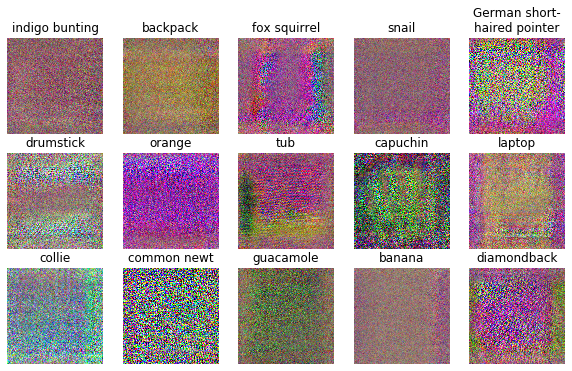

In [14]:
images, labels = get_labeled_images(path, regex)
grid = make_grid_plot(images, labels, figsize=figsize, label_wrap_width=label_wrap_width)
grid.show()
grid.savefig(output_file, bbox_inches='tight')

In [29]:
# parameters
path = 'Report/Figures/Experiments/DI Image Examples'
regex = r'\d*_([^\.,]*).*'
figsize = (15, 10)
label_wrap_width = 15
output_file = os.path.join(os.path.dirname(path), 'DI Image Examples.png')
print(output_file)

Report/Figures/Experiments/DI Image Examples.png


/Users/adambotach/opt/miniconda3/envs/cs236781-hw/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


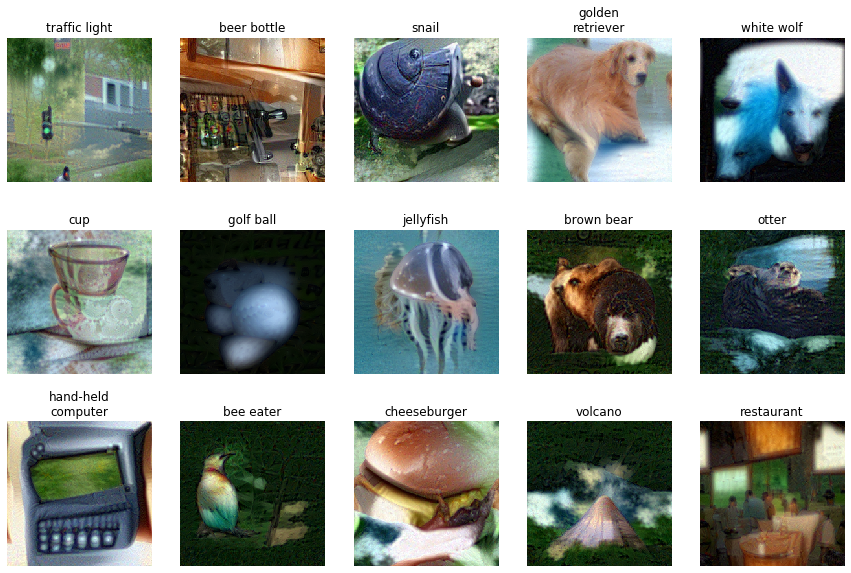

In [30]:
images, labels = get_labeled_images(path, regex)
grid = make_grid_plot(images, labels, figsize=figsize, label_wrap_width=label_wrap_width)
grid.show()
grid.savefig(output_file, bbox_inches='tight')